In [2]:
import os
from PIL import Image, ImageEnhance
import random

# Veri seti ana dizini
base_dir = "/kaggle/input/eski-veri-seti-snf-karm"

# Minimum sayıya ulaşmak için hedef değer
target_count = None

# 1️⃣ Sınıflardaki görsel sayılarını say
class_counts = {}
for class_dir in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_dir)
    if os.path.isdir(class_path):
        img_count = len([img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_dir] = img_count

# Sonuçları yazdır ve minimum değeri belirle
print("\n📊 Sınıflardaki Görsel Sayıları:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} görsel")
target_count = min(class_counts.values()) if class_counts else 0

# 2️⃣ Dengesizlik tespiti ve augmentasyon
def augment_image(img_path, save_path):
    with Image.open(img_path) as img:
        # Renk iyileştirme
        enhancer = ImageEnhance.Color(img)
        img = enhancer.enhance(random.uniform(0.5, 1.5))
        # Döndürme
        img = img.rotate(random.choice([0, 90, 180, 270]))
        # Ayna yansıması
        if random.choice([True, False]):
            img = img.transpose(Image.FLIP_LEFT_RIGHT)
        # Kaydet
        img.save(save_path)

# 3️⃣ Azınlık sınıfları artır
for class_dir, count in class_counts.items():
    class_path = os.path.join(base_dir, class_dir)
    # Eksik görsel sayısını hesapla
    missing = target_count - count
    if missing > 0:
        print(f"\n🔄 '{class_dir}' için {missing} yeni görsel üretiliyor...")
        existing_images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]
        
        for i in range(missing):
            img_name = random.choice(existing_images)
            img_path = os.path.join(class_path, img_name)
            new_img_name = f"aug_{i}_{img_name}"
            new_img_path = os.path.join(class_path, new_img_name)
            augment_image(img_path, new_img_path)
        print(f"✅ {class_dir} dengelendi!")

print("\n🎯 Veri seti dengelendi ve augmentasyon tamamlandı!")



📊 Sınıflardaki Görsel Sayıları:
N: 2873 görsel
H: 128 görsel
M: 232 görsel
G: 284 görsel
A: 266 görsel
O: 708 görsel
C: 293 görsel
D: 1608 görsel

🎯 Veri seti dengelendi ve augmentasyon tamamlandı!


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


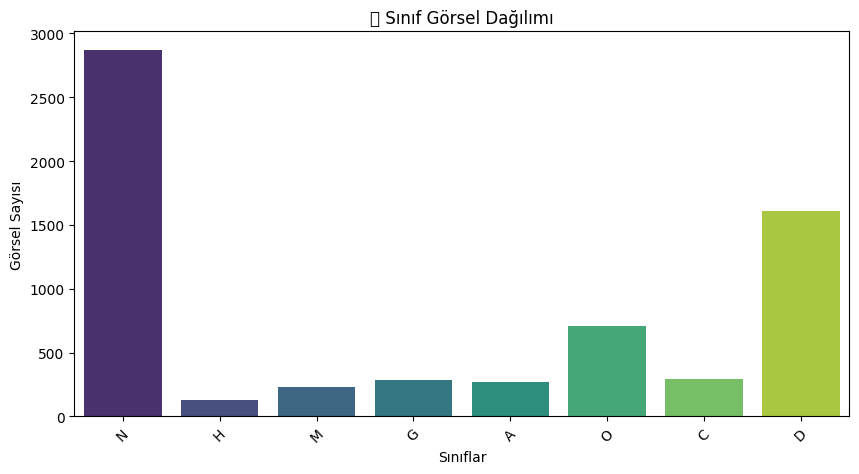

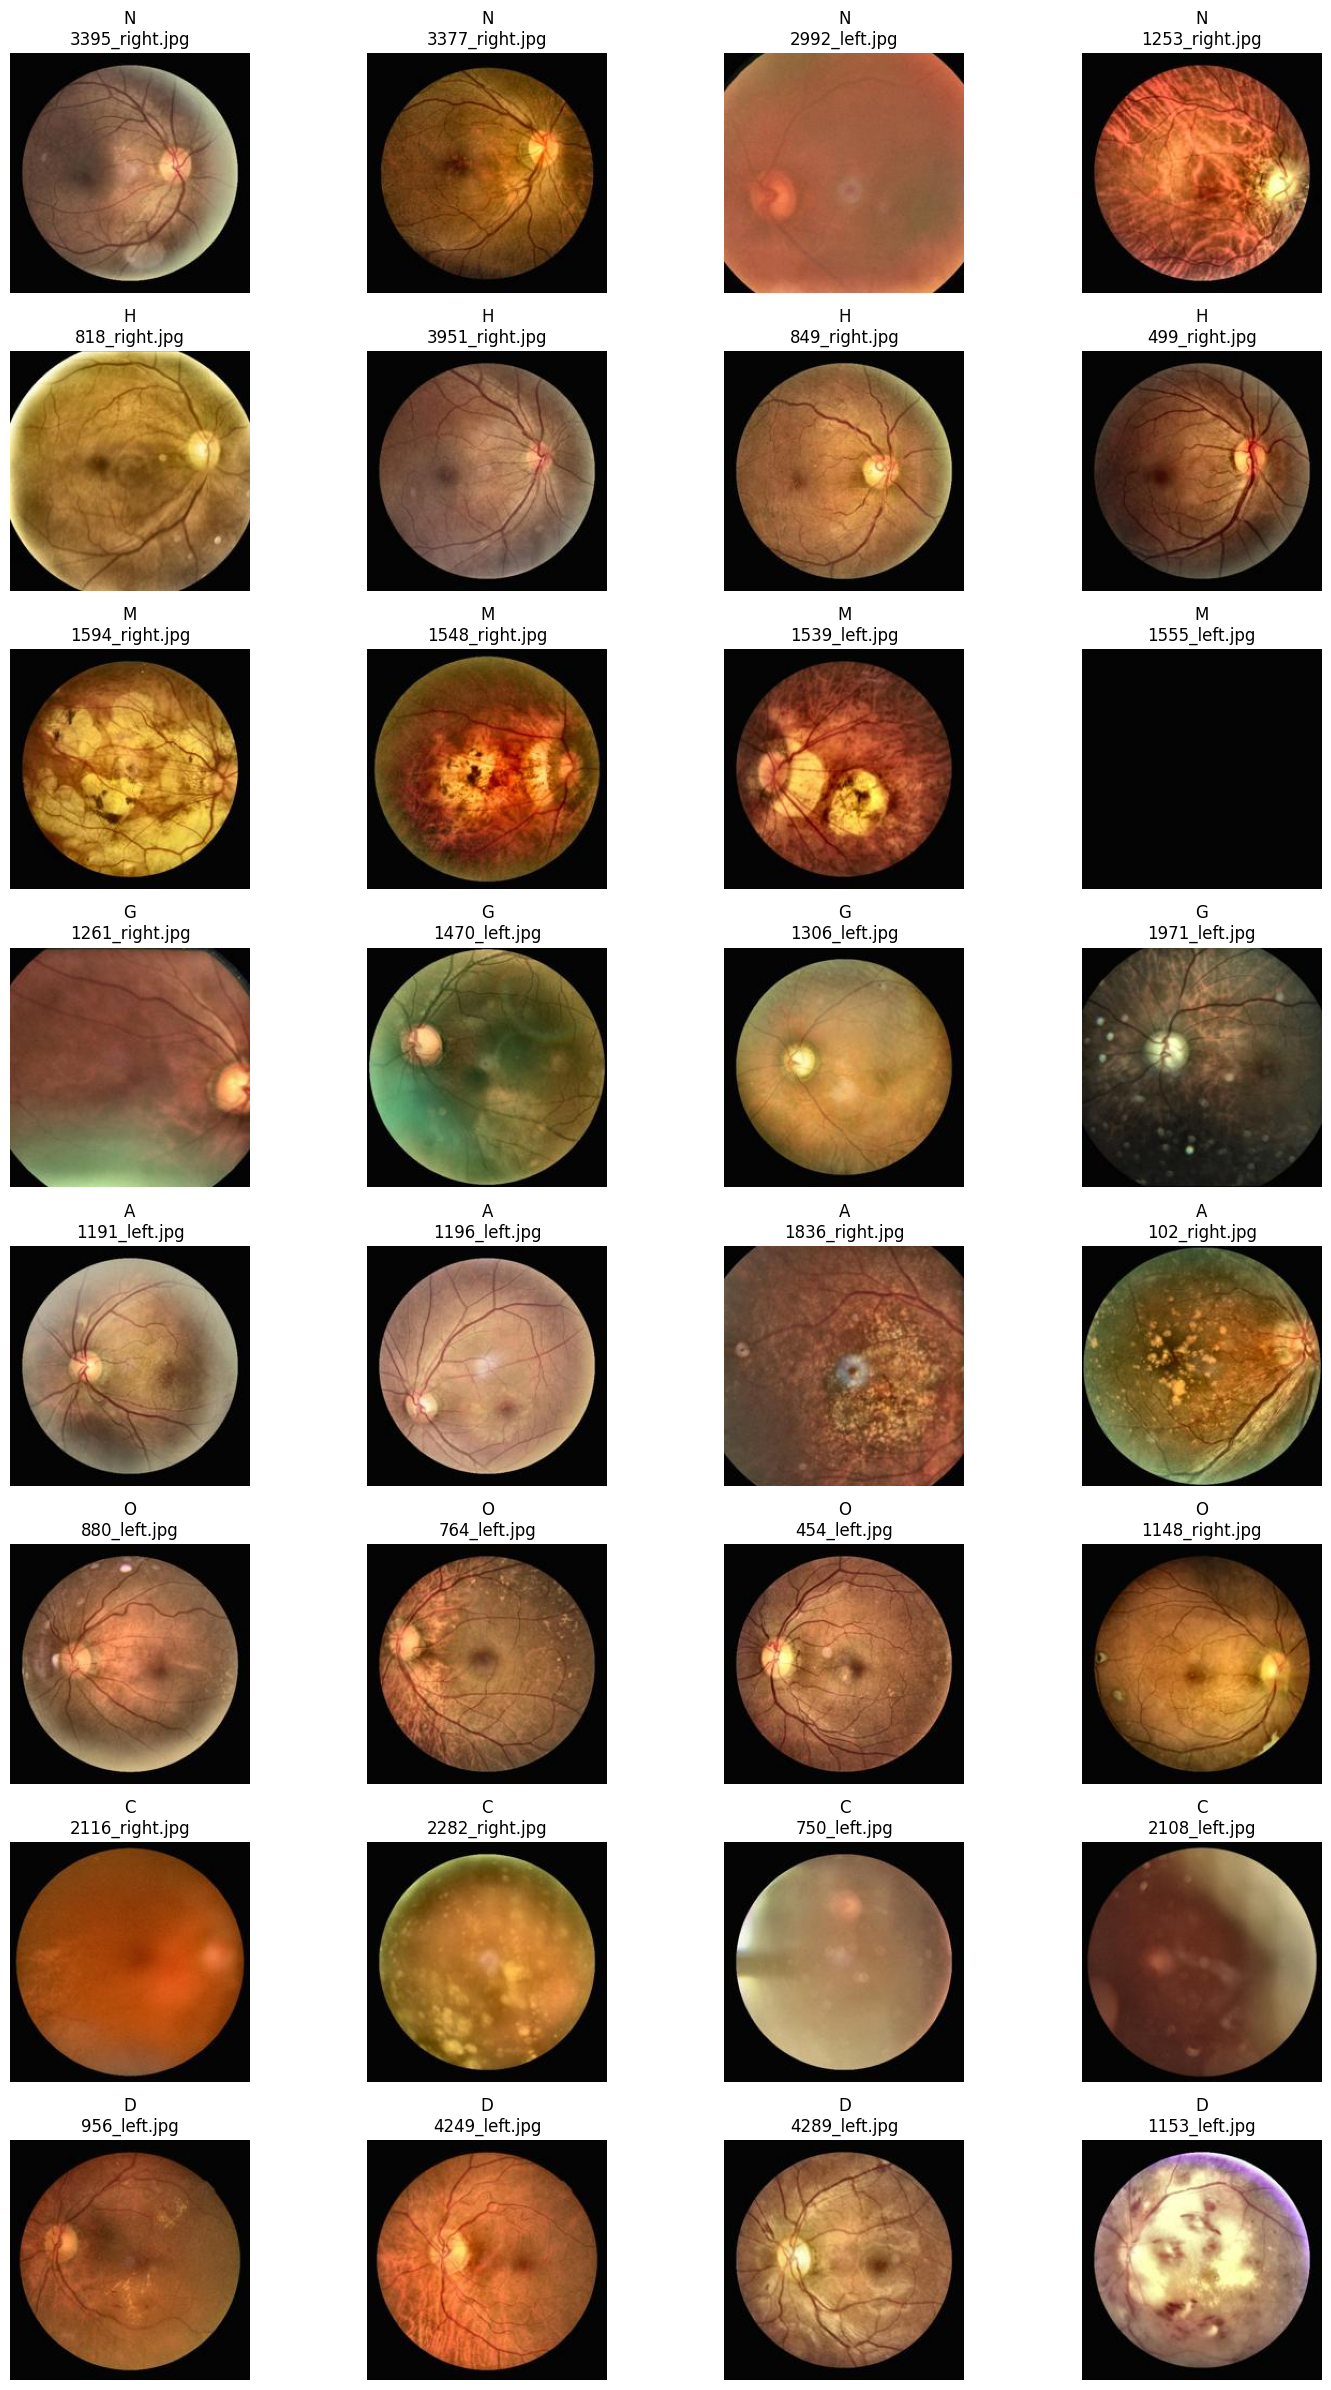


📊 Sınıf Dağılımı:
N: 2873 görsel
H: 128 görsel
M: 232 görsel
G: 284 görsel
A: 266 görsel
O: 708 görsel
C: 293 görsel
D: 1608 görsel

⚖️ Maksimum Görsel Sayısı: 2873
⚖️ Minimum Görsel Sayısı: 128

⚠️ Veri setinde dengesizlik olabilir. Augmentasyon ayarlarını kontrol edin.


In [3]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import seaborn as sns
from collections import Counter


# 1️⃣ Sınıf Dağılımını Görselleştir
class_counts = {class_name: len(os.listdir(os.path.join(base_dir, class_name)))
                for class_name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, class_name))}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("🔍 Sınıf Görsel Dağılımı")
plt.xlabel("Sınıflar")
plt.ylabel("Görsel Sayısı")
plt.xticks(rotation=45)
plt.show()

# 2️⃣ Her Sınıftan Rastgele 4 Görsel Göster
fig, axes = plt.subplots(len(class_counts), 4, figsize=(15, len(class_counts) * 3))

for i, (class_name, count) in enumerate(class_counts.items()):
    class_path = os.path.join(base_dir, class_name)
    images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]
    random_images = random.sample(images, min(len(images), 4))

    for j, img_name in enumerate(random_images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(f"{class_name}\n{img_name}")
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()

# 3️⃣ Verileri Analiz Et
print("\n📊 Sınıf Dağılımı:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} görsel")

max_count = max(class_counts.values())
min_count = min(class_counts.values())
print(f"\n⚖️ Maksimum Görsel Sayısı: {max_count}")
print(f"⚖️ Minimum Görsel Sayısı: {min_count}")

# 4️⃣ Dengeli mi kontrol et
if max_count == min_count:
    print("\n✅ Veri seti dengeli!")
else:
    print("\n⚠️ Veri setinde dengesizlik olabilir. Augmentasyon ayarlarını kontrol edin.")



✅ Veri artırma tamamlandı!


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


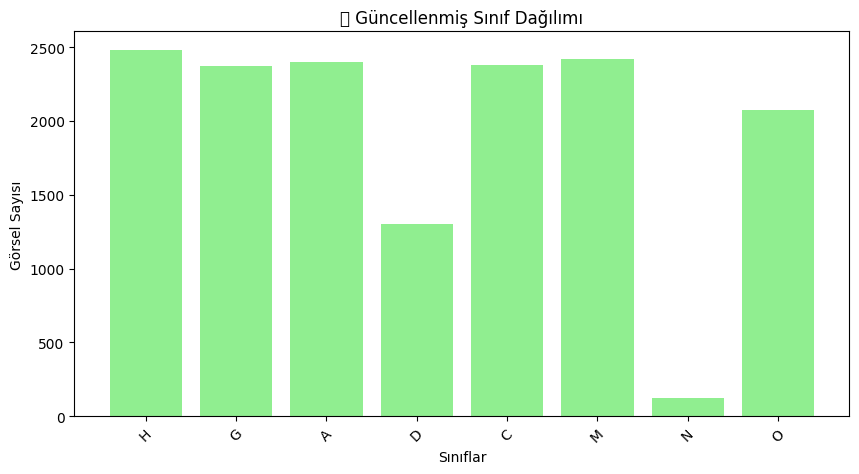

In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import random
import numpy as np
import matplotlib.pyplot as plt

# Veri artırma ayarları
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Klasörleri kontrol et ve oluştur
output_dir = "/kaggle/working/augmented_images"
os.makedirs(output_dir, exist_ok=True)

# Hedef sınıf başına görsel sayısı
target_count = 3000

# Veri artırma işlemi
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Çıktı için yeni klasör oluştur
    class_output_path = os.path.join(output_dir, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    # Mevcut görselleri al
    images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.jpeg', '.png'))]
    current_count = len(images)

    # Veri artırma
    while current_count < target_count:
        img_name = random.choice(images)
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path)
        img_array = img_to_array(img).reshape((1,) + img.size[::-1] + (3,))

        # Görsel artırma ve kaydetme
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=class_output_path, save_prefix="aug", save_format="jpg"):
            current_count += 1
            if current_count >= target_count:
                break

print("\n✅ Veri artırma tamamlandı!")

# Yeni dağılımı kontrol et
class_counts = {cls: len(os.listdir(os.path.join(output_dir, cls))) for cls in os.listdir(output_dir)}
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='lightgreen')
plt.title("📊 Güncellenmiş Sınıf Dağılımı")
plt.xlabel("Sınıflar")
plt.ylabel("Görsel Sayısı")
plt.xticks(rotation=45)
plt.show()


In [6]:
import os
import shutil

# Kaynak klasörler
old_dataset = "/kaggle/input/eski-veri-seti-snf-karm"
new_dataset = "/kaggle/working/augmented_images"

# Hedef klasör
merged_dataset = "/kaggle/working/merged_dataset"
os.makedirs(merged_dataset, exist_ok=True)

# Sınıfları birleştir
for class_name in os.listdir(old_dataset):
    old_class_path = os.path.join(old_dataset, class_name)
    new_class_path = os.path.join(new_dataset, class_name)
    merged_class_path = os.path.join(merged_dataset, class_name)

    # Klasör oluştur
    os.makedirs(merged_class_path, exist_ok=True)

    # Eski veri setini kopyala
    if os.path.exists(old_class_path):
        for file in os.listdir(old_class_path):
            src = os.path.join(old_class_path, file)
            dst = os.path.join(merged_class_path, file)
            shutil.copy2(src, dst)

    # Yeni veri setini kopyala
    if os.path.exists(new_class_path):
        for file in os.listdir(new_class_path):
            src = os.path.join(new_class_path, file)
            dst = os.path.join(merged_class_path, file)
            shutil.copy2(src, dst)

print("\n✅ Veri setleri başarıyla birleştirildi!")

# Son dağılımı kontrol et
class_counts



✅ Veri setleri başarıyla birleştirildi!


{'H': 2482,
 'G': 2373,
 'A': 2400,
 'D': 1302,
 'C': 2377,
 'M': 2420,
 'N': 127,
 'O': 2074}

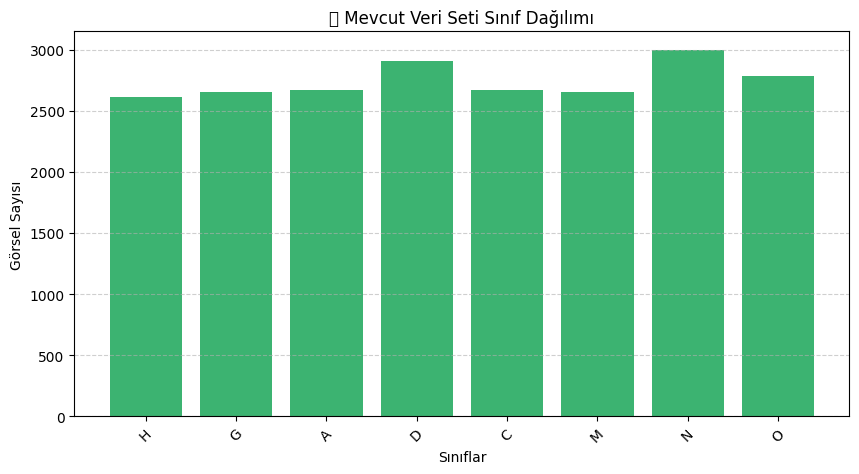

H: 2610 görsel
G: 2657 görsel
A: 2666 görsel
D: 2910 görsel
C: 2670 görsel
M: 2652 görsel
N: 3000 görsel
O: 2782 görsel

✅ Mevcut veri seti başarıyla görselleştirildi.


In [7]:
import os
import matplotlib.pyplot as plt

# Veri seti yolu
dataset_path = "/kaggle/working/merged_dataset"

# Sınıf dağılımını almak
class_counts = {class_name: len(os.listdir(os.path.join(dataset_path, class_name))) 
                for class_name in os.listdir(dataset_path)}

# Dağılımı görselleştir
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='mediumseagreen')
plt.title("📊 Mevcut Veri Seti Sınıf Dağılımı")
plt.xlabel("Sınıflar")
plt.ylabel("Görsel Sayısı")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Sınıf dağılımını yazdır
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} görsel")

print("\n✅ Mevcut veri seti başarıyla görselleştirildi.")


In [8]:
import shutil

destination_root='/kaggle/working/merged_dataset'

# Hedef ZIP dosyasının adı ve konumu
zip_file_name = "/kaggle/working/merged_dataset.zip"

# Hedef klasörü ZIP'e sıkıştır
shutil.make_archive(base_name=zip_file_name.replace('.zip', ''), 
                    format='zip', 
                    root_dir=destination_root)

print(f"ZIP file created at: {zip_file_name}")

ZIP file created at: /kaggle/working/merged_dataset.zip


In [9]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Ana veri dizini ve hedef dizinleri tanımla
base_dir = "/kaggle/working/merged_dataset"
output_dir = "/kaggle/working/split_dataset"
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

# Oranları belirle
test_size = 0.2

# Mevcut dizinleri temizle ve yeniden oluştur
for folder in [train_dir, test_dir]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder)

# Her bir sınıfı ayrı ayrı işle
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    
    # Görselleri listele ve train/test olarak ayır
    images = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.jpeg', '.png'))]
    train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)
    
    # Hedef klasörleri oluştur
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # Görselleri ilgili klasörlere taşı
    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(train_class_dir, img))
    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(test_class_dir, img))

print("✅ Veri başarıyla train/test olarak bölündü.")


✅ Veri başarıyla train/test olarak bölündü.
